In [187]:
import pandas as pd

In [188]:
df_clean = pd.read_csv("McDonald_s_Reviews.csv", encoding='latin-1')
df_clean = df_clean[["store_address", "latitude ", "longitude", "rating_count", "review_time", "review", "rating"]]

# Convert the rating column to a numeric one
df_clean.loc[:, "rating (stars)"] = df_clean["rating"].str.split(' ').map(lambda x: x[0] if len(x) > 0 else None)
df_clean = df_clean.drop(["rating"], axis=1)
df_clean["rating (stars)"] = df_clean["rating (stars)"].astype(int)

df_clean.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars)
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,1
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,1
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [189]:
df_clean.describe()

,latitude,longitude,rating_count,rating (stars)
count,32736.000000,32736.000000,33396.000000,33396.000000
mean,34.442546,-90.647033,2582.135286,3.131363
std,5.344116,16.594844,2507.312674,1.615139
min,25.790295,-121.995421,263.000000,1.000000
25%,28.655350,-97.792874,1406.000000,1.000000
50%,33.931261,-81.471414,1795.000000,3.000000
75%,40.727401,-75.399919,2810.000000,5.000000
max,44.981410,-73.459820,19682.000000,5.000000


In [190]:
# check how many restaurants there are
total_restaurants = len(df_clean["store_address"].unique().tolist())

print("Total number of restaurants is: ", total_restaurants)

Total number of restaurants is:  40


Let's break down the location of the stores and begin witht the city and state they are in.

In [191]:
# find all the US states and city which are listed
# we compare if len() if the list with address is at least 3 bc we want to extract the 3rd element (state is at index 2 if exists)

# same holds for the city (city is at index 2 of the list if it exists)
df_clean.loc[:, "state"] = df_clean["store_address"].str.split(", ").map(lambda x: x[2] if len(x) >= 3 else None)
# we need to remove the state code as well and leave only state
df_clean.loc[:, "state"] = df_clean["state"].str.split(" ").map(lambda x: x[0] if x else None)

df_clean.loc[:, "city"] = df_clean["store_address"].str.split(", ").map(lambda x: x[1] if len(x) >= 2 else None)
df_clean.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars),state,city
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,1,TX,Austin
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4,TX,Austin
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,1,TX,Austin
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,TX,Austin
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1,TX,Austin


Find the unique number of states and cities

In [192]:
# unique nr of states
nr_states = len(df_clean["state"].unique().tolist())
nr_cities = len(df_clean["city"].unique().tolist())

print("Total number of states is: ", nr_states)
print("Total number of cities is: ", nr_cities)

Total number of states is:  12
Total number of cities is:  27


So we have a total of 40 restaurants located amongst 27 cities and 12 states.

Let's see the avg stars for each state/city

In [193]:
state_avg_stars = df_clean.groupby("state")["rating (stars)"].agg("mean").to_frame().reset_index()
state_avg_stars["rating (stars)"] = round(state_avg_stars["rating (stars)"], 2)
state_avg_stars.sort_values(by="rating (stars)", ascending=False, inplace=True)
state_avg_stars

,state,rating (stars)
10,VA,3.70
1,DC,3.59
7,PA,3.46
3,IL,3.36
6,NY,3.30
5,NJ,3.26
0,CA,3.19
8,TX,3.16
4,Las,2.98
2,FL,2.87


In [194]:
state_city_reviews = df_clean.groupby(['state', 'city']).agg({"rating (stars)": "mean", "rating_count": ["sum", "mean"]})
# Flatten multi-level columns
state_city_reviews.columns = ['_'.join(col).strip() if col[1] else col[0] for col in state_city_reviews.columns]
state_city_reviews

rating (stars)_mean  rating_count_sum  \
state city                                                           
CA    Los Angeles                       2.805609           2753735   
      North Hollywood                   3.377193           3068700   
      San Diego                         3.166667           1090620   
      Santa Monica                      3.192683           2771830   
      Sunnyvale                         3.330000           1249600   
DC    Washington                        3.594436            867546   
FL    Fern Park                         3.470588           2750040   
      Kissimmee                         2.810465           9574470   
      Miami                             2.557962           4410840   
      Miami Beach                       1.971930           2805540   
      Orlando                           2.889968          21293450   
IL    Oak Park                          3.362184           1091954   
Las   3999 S Las Vegas Blvd             2.978641           2435950   
NJ    Newark                            2.993023           2017750   
      Voorhees Township                 3.615058            879819   
NY    Champlain                         3.269355            809730   
      New York                          3.309237           8539122   
      Queens                            3.285965           2500020   
PA    Brodheadsville                    3.463035           1056784   
TX    Austin                            2.910197           2293956   
      Dallas                            3.143636           4385190   
      Fort Worth                        3.270588            813450   
      Roanoke                           3.465753           1165834   
      San Antonio                       3.127559            927100   
UT    Salt Lake City                    2.525843           2886270   
VA    Annandale                         3.697674            358190   

                             rating_count_mean  
state city                                      
CA    Los Angeles                  2663.186654  
      North Hollywood              1794.561404  
      San Diego                     886.682927  
      Santa Monica                 3380.280488  
      Sunnyvale                    1562.000000  
DC    Washington                   1270.199122  
FL    Fern Park                    1617.670588  
      Kissimmee                    5566.552326  
      Miami                        2809.452229  
      Miami Beach                  4922.000000  
      Orlando                      6891.084142  
IL    Oak Park                     1454.000000  
Las   3999 S Las Vegas Blvd        2365.000000  
NJ    Newark                       1564.147287  
      Voorhees Township             933.000000  
NY    Champlain                    1306.016129  
      New York                     2449.547332  
      Queens                       2193.000000  
PA    Brodheadsville               1028.000000  
TX    Austin                       1329.059096  
      Dallas                       2657.690909  
      Fort Worth                    957.000000  
      Roanoke                       998.145548  
      San Antonio                  1460.000000  
UT    Salt Lake City               3243.000000  
VA    Annandale                     595.000000

In [195]:
# reset the index 
state_city_reviews_new = state_city_reviews.reset_index()
state_city_reviews_new.head()

,state,city,rating (stars)_mean,rating_count_sum,rating_count_mean
0,CA,Los Angeles,2.805609,2753735,2663.186654
1,CA,North Hollywood,3.377193,3068700,1794.561404
2,CA,San Diego,3.166667,1090620,886.682927
3,CA,Santa Monica,3.192683,2771830,3380.280488
4,CA,Sunnyvale,3.330000,1249600,1562.000000


Aggregate only on a state level to make a clearer plot

In [196]:
state_reviews = df_clean.groupby('state').agg({"rating (stars)": "mean", "rating_count": ["sum", "mean"]})
# Flatten multi-level columns
state_reviews.columns = ['_'.join(col).strip() if col[1] else col[0] for col in state_reviews.columns]
state_reviews.reset_index(inplace=True)
state_reviews["rating (stars)_mean"] = round(state_reviews["rating (stars)_mean"], 2)
state_reviews["rating_count_sum"] = round(state_reviews["rating_count_sum"], 2)
state_reviews["rating_count_mean"] = round(state_reviews["rating_count_mean"], 2)

state_reviews

,state,rating (stars)_mean,rating_count_sum,rating_count_mean
0,CA,3.19,10934485,1954.68
1,DC,3.59,867546,1270.20
2,FL,2.87,40834340,4720.73
3,IL,3.36,1091954,1454.00
4,Las,2.98,2435950,2365.00
5,NJ,3.26,2897569,1297.61
6,NY,3.30,11848872,2258.65
7,PA,3.46,1056784,1028.00
8,TX,3.16,9585530,1589.90
9,UT,2.53,2886270,3243.00


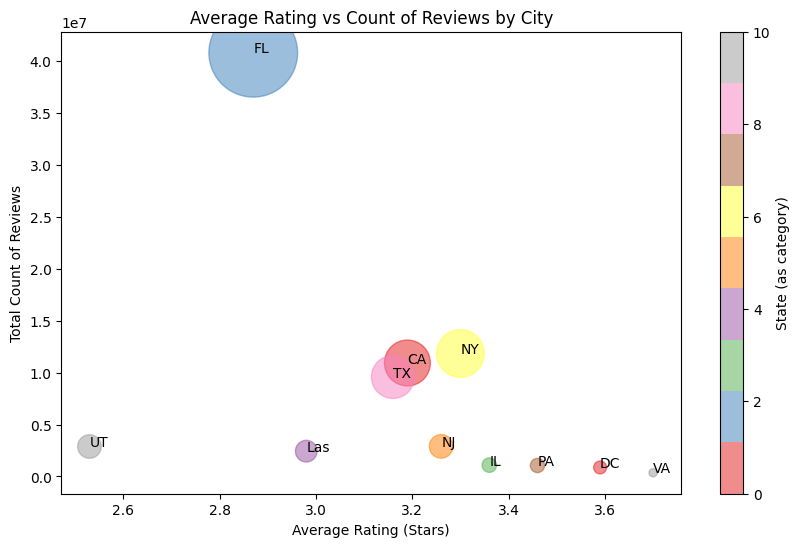

In [197]:
import matplotlib.pyplot as plt


# Create a bubble chart
plt.figure(figsize=(10, 6))

# Use a scatter plot where bubble size reflects rating_count
bubble_size = state_reviews['rating_count_sum'] / 10000  # Adjust the division factor to change bubble size

# Create the scatter plot
scatter = plt.scatter(state_reviews['rating (stars)_mean'], state_reviews['rating_count_sum'], s=bubble_size, 
                      alpha=0.5, c=state_reviews['state'].astype('category').cat.codes, cmap='Set1')

# Add labels
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Total Count of Reviews')
plt.title('Average Rating vs Count of Reviews by City')

# Add state labels next to each point
for i in range(state_reviews.shape[0]):
    plt.text(state_reviews['rating (stars)_mean'][i], state_reviews['rating_count_sum'][i], state_reviews['state'][i])

# Display the chart
plt.colorbar(scatter, label='State (as category)')
plt.show()

In [198]:
# Create a pivot table to calculate average rating for each state and city
pivot_state_city= pd.pivot_table(df_clean, values=['rating (stars)', "rating_count"], index=['state', 'city'], aggfunc='mean')
pivot_state_city

rating (stars)  rating_count
state city                                               
CA    Los Angeles                  2.805609   2663.186654
      North Hollywood              3.377193   1794.561404
      San Diego                    3.166667    886.682927
      Santa Monica                 3.192683   3380.280488
      Sunnyvale                    3.330000   1562.000000
DC    Washington                   3.594436   1270.199122
FL    Fern Park                    3.470588   1617.670588
      Kissimmee                    2.810465   5566.552326
      Miami                        2.557962   2809.452229
      Miami Beach                  1.971930   4922.000000
      Orlando                      2.889968   6891.084142
IL    Oak Park                     3.362184   1454.000000
Las   3999 S Las Vegas Blvd        2.978641   2365.000000
NJ    Newark                       2.993023   1564.147287
      Voorhees Township            3.615058    933.000000
NY    Champlain                    3.269355   1306.016129
      New York                     3.309237   2449.547332
      Queens                       3.285965   2193.000000
PA    Brodheadsville               3.463035   1028.000000
TX    Austin                       2.910197   1329.059096
      Dallas                       3.143636   2657.690909
      Fort Worth                   3.270588    957.000000
      Roanoke                      3.465753    998.145548
      San Antonio                  3.127559   1460.000000
UT    Salt Lake City               2.525843   3243.000000
VA    Annandale                    3.697674    595.000000

In [199]:
pivot_state_city.reset_index(inplace=True)

In [200]:
# round the numbers
pivot_state_city["rating (stars)"] = pivot_state_city["rating (stars)"].round(1)
pivot_state_city["rating_count"] = pivot_state_city["rating_count"].round(0)

pivot_state_city.to_csv("pivoted_data.csv")

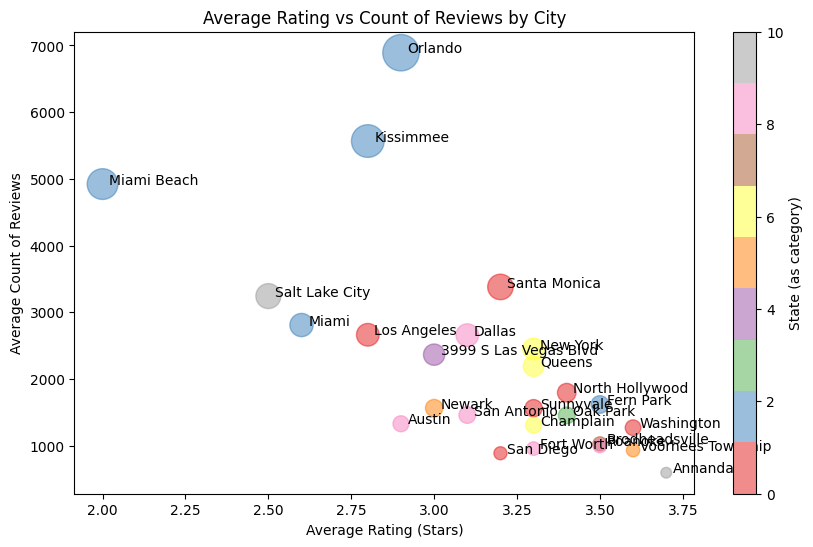

In [97]:
import matplotlib.pyplot as plt

# Create a bubble chart
plt.figure(figsize=(10, 6))

# Use a scatter plot where bubble size reflects rating_count
bubble_size = pivot_state_city['rating_count'] / 10  # Adjust the division factor to change bubble size

# Create the scatter plot
scatter = plt.scatter(pivot_state_city['rating (stars)'], pivot_state_city['rating_count'], s=bubble_size, 
                      alpha=0.5, c=pivot_state_city['state'].astype('category').cat.codes, cmap='Set1')

# Add labels
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Average Count of Reviews')
plt.title('Average Rating vs Count of Reviews by City')

# Add state labels next to each point
for i in range(pivot_state_city.shape[0]):
    plt.text(pivot_state_city['rating (stars)'][i] + 0.02, pivot_state_city['rating_count'][i], pivot_state_city['city'][i])

# Display the chart
plt.colorbar(scatter, label='State (as category)')
plt.show()

The above plot is too nested thus, it'd be better to apply some kind of filtering to it (e.g. on state). So, in the "main.py" file we create an interactive dashboard which allows to filter for different states. <br> <br> 
We can see that in Miami Beach the number of reveiws is high and the avg rating is low. Let's try to perform a sentiment analysis o nthe restaurants in that area to see what's hapenning there.

In [201]:
import vaderSentiment 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [119]:
df_clean["review"].head(10)

0    Why does it look like someone spit on my food?...
1    It'd McDonalds. It is what it is as far as the...
2    Made a mobile order got to the speaker and che...
3    My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4    I repeat my order 3 times in the drive thru, a...
5    I work for door dash and they locked us all ou...
6    If I  could give this location a zero on custo...
7    Came in and ordered a Large coffee w/no ice. T...
8    Went thru drive thru. Ordered. Getting home no...
9    I'm not really a huge fan of fast food, but I ...
Name: review, dtype: object

In [202]:
import re

# Function to remove non-ASCII characters
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Apply it to your reviews column
df_clean['cleaned_reviews'] = df_clean['review'].apply(remove_non_ascii)

df_clean['cleaned_reviews']

0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was  customer s...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                             The service is very good
33393                           To remove hunger is enough
33394    It's good, but lately it has become very expen...
33395                            they took good care of me
Name: cleaned_reviews, Length: 33396, dtype: object

In [136]:
import nltk
nltk.download('punkt', download_dir='c:/Users/20184276/Desktop/random projects/McDonalds Reviews/mcdonalds-reviews/venv/nltk')
nltk.download('stopwords', download_dir='c:/Users/20184276/Desktop/random projects/McDonalds Reviews/mcdonalds-reviews/venv/nltk')

[nltk_data] Downloading package punkt to
[nltk_data]     c:/Users/20184276/Desktop/random projects/McDonalds
[nltk_data]     Reviews/mcdonalds-reviews/venv/nltk...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     c:/Users/20184276/Desktop/random projects/McDonalds
[nltk_data]     Reviews/mcdonalds-reviews/venv/nltk...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [148]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\20184276\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\20184276\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\20184276\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\20184276\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\20184276\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]  

True

In [203]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stop_words(text):
    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Tokenize the text
    word_tokens = word_tokenize(text)
    # print(word_tokens)
    # Remove stopwords
    filtered_review = [word for word in word_tokens if word.lower() not in stop_words]

    # Join the words back into a sentence
    cleaned_review = ' '.join(filtered_review)

    return cleaned_review

def calculate_sentiment(text):
    sentimentAnalyser = SentimentIntensityAnalyzer()
    # Add custom negative terms or boost existing ones
    sentimentAnalyser.lexicon.update({
        'spit': -5,
        'milky white': -4,
        'd*** sure': -3,
        'cold': -3,
        'rude': -4
    })
    
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the positive, negative and compound score
    compound_score = scores['compound']
    positive_score = scores['pos']
    negative_score = scores['neg']

    # Return compound score
    return compound_score, positive_score, negative_score

In [204]:
# test the tokenizer
from nltk.tokenize import word_tokenize

text = "It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places."
word_tokens = word_tokenize(text)
print(text)

It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant experience than many other fast food places.


In [208]:
# Apply the function to every row in the "text" column and output the results into a new column "sentiment_score"
df_clean['cleaned_reviews'] = df_clean['cleaned_reviews'].apply(remove_stop_words)
df_clean[['compound_sentiment', 'positive_sentiment', 'negative_sentiment']] = df_clean['cleaned_reviews'].apply(lambda x: pd.Series(calculate_sentiment(x)))

In [209]:
df_clean.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating (stars),state,city,cleaned_reviews,compound_sentiment,positive_sentiment,negative_sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,1,TX,Austin,look like someone spit food ? normal transacti...,-0.5302,0.120,0.180
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4,TX,Austin,'d McDonalds . far food atmosphere go . staff ...,0.8591,0.292,0.000
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,1,TX,Austin,Made mobile order got speaker checked . Line m...,-0.2960,0.000,0.086
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,TX,Austin,mc . Crispy chicken sandwich customer service ...,0.0000,0.000,0.000
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1,TX,Austin,"repeat order 3 times drive thru , still manage...",-0.7184,0.000,0.167


In [212]:
# aggregate by state and city and get the sentiment score
state_city_sentiment = df_clean.groupby(["state", "city"]).agg({"compound_sentiment": "mean", "positive_sentiment": "mean",
                                                                "negative_sentiment": "mean", "rating (stars)": "mean", "rating_count": ["mean", "count"]})
# Flatten multi-level columns
state_city_sentiment.columns = ['_'.join(col).strip() if col[1] else col[0] for col in state_city_sentiment.columns]
state_city_sentiment.reset_index(inplace=True)
state_city_sentiment["rating (stars)_mean"] = round(state_city_sentiment["rating (stars)_mean"], 1)
state_city_sentiment["rating_count_count"] = round(state_city_sentiment["rating_count_count"], 2)
state_city_sentiment["rating_count_mean"] = round(state_city_sentiment["rating_count_mean"], 2)
state_city_sentiment["compound_sentiment_mean"] = round(state_city_sentiment["compound_sentiment_mean"], 2)
state_city_sentiment["positive_sentiment_mean"] = round(state_city_sentiment["positive_sentiment_mean"], 2)
state_city_sentiment["negative_sentiment_mean"] = round(state_city_sentiment["negative_sentiment_mean"], 2)

state_city_sentiment

,state,city,compound_sentiment_mean,positive_sentiment_mean,negative_sentiment_mean,rating (stars)_mean,rating_count_mean,rating_count_count
0,CA,Los Angeles,0.12,0.21,0.11,2.8,2663.19,1034
1,CA,North Hollywood,0.19,0.30,0.09,3.4,1794.56,1710
2,CA,San Diego,0.17,0.35,0.12,3.2,886.68,1230
3,CA,Santa Monica,0.17,0.21,0.10,3.2,3380.28,820
4,CA,Sunnyvale,0.19,0.31,0.08,3.3,1562.00,800
5,DC,Washington,0.23,0.40,0.09,3.6,1270.20,683
6,FL,Fern Park,0.23,0.38,0.09,3.5,1617.67,1700
7,FL,Kissimmee,0.15,0.20,0.10,2.8,5566.55,1720
8,FL,Miami,0.00,0.21,0.14,2.6,2809.45,1570
9,FL,Miami Beach,-0.16,0.14,0.17,2.0,4922.00,570


In [213]:
# save the data and use it in a dash plot
state_city_sentiment.to_csv("state_city_sentiment.csv", index=False)

Let's focus on Miami Beach

In [218]:
miami_df = df_clean[df_clean["city"] == "Miami Beach"]

# lets get only negative reviews (reviews with negative score > 0.2)
miami_df = miami_df[miami_df["negative_sentiment"] >= 0.2]
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 10641 to 11207
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_address       212 non-null    object 
 1   latitude            212 non-null    float64
 2   longitude           212 non-null    float64
 3   rating_count        212 non-null    int64  
 4   review_time         212 non-null    object 
 5   review              212 non-null    object 
 6   rating (stars)      212 non-null    int64  
 7   state               212 non-null    object 
 8   city                212 non-null    object 
 9   cleaned_reviews     212 non-null    object 
 10  compound_sentiment  212 non-null    float64
 11  positive_sentiment  212 non-null    float64
 12  negative_sentiment  212 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 23.2+ KB


In [219]:
from sklearn.feature_extraction.text import CountVectorizer

negative_reviews = miami_df["cleaned_reviews"].tolist()
# Vectorize negative reviews
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(negative_reviews)

# Sum the word frequencies
word_freq = X.sum(axis=0)

# Get the most common words/phrases
common_words = [(word, word_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)

print(common_words[:30])  # Top 10 complaints


[('service', np.int64(82)), ('food', np.int64(75)), ('order', np.int64(74)), ('worst', np.int64(67)), ('rude', np.int64(58)), ('place', np.int64(53)), ('bad', np.int64(50)), ('dirty', np.int64(45)), ('staff', np.int64(45)), ('mcdonald', np.int64(43)), ('like', np.int64(34)), ('horrible', np.int64(29)), ('mcdonalds', np.int64(29)), ('cold', np.int64(28)), ('wrong', np.int64(28)), ('minutes', np.int64(23)), ('terrible', np.int64(21)), ('time', np.int64(21)), ('worst mcdonald', np.int64(21)), ('ve', np.int64(21)), ('people', np.int64(20)), ('location', np.int64(20)), ('really', np.int64(20)), ('employees', np.int64(20)), ('experience', np.int64(19)), ('customer', np.int64(18)), ('worst mcdonalds', np.int64(17)), ('restaurant', np.int64(16)), ('english', np.int64(16)), ('customers', np.int64(16))]


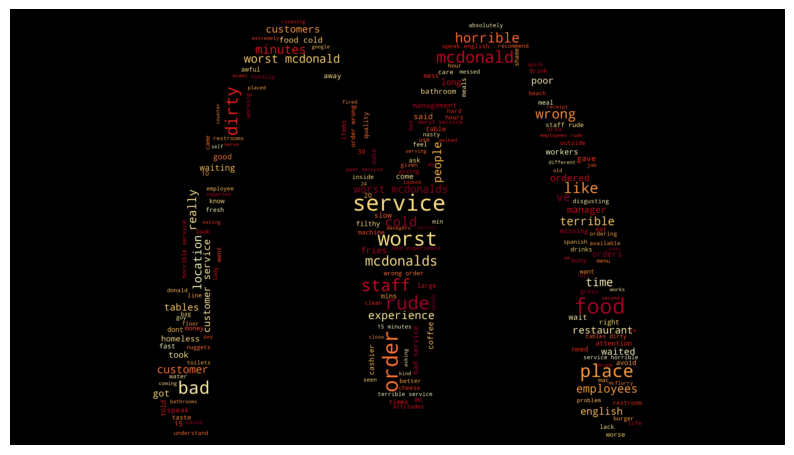

In [240]:
import wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np

logo_mask = np.array(Image.open('McDonalds-sign.png'))

# Convert the list of tuples to a dictionary
word_freq_dict = {word: int(count) for word, count in common_words}

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', contour_color="black", contour_width=0.2, colormap='YlOrRd',
                      mask=logo_mask, stopwords=["like", "mcdonalds", "mcdonald", "english"]).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Disable axis
plt.show()

include in the dashboard functionality to present top negative/positive reviews and categorize them as complaints and good feedback when you click and possibly load a wordcloud.

In [222]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # 5 topics
lda.fit(X)

# Display the topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])  # Top 10 words


Topic #1:
['items', 'missing', 'poor', 'mcdonald', 'worst', 'food', 'rude', 'order', 'staff', 'service']
Topic #2:
['mcdonald', 'service', 'employees', 'rude', 'dirty', 'bad', 'mcdonalds', 'food', 'worst', 'like']
Topic #3:
['staff', 'cold', 'dirty', 'worst', 'bad', 'place', 'order', 'rude', 'food', 'service']
Topic #4:
['rude', 'like', 'food', 'bad', 'wrong', 'dirty', 'place', 'staff', 'worst', 'order']
Topic #5:
['staff', 'worst mcdonald', 'dirty', 'place', 'bad', 'food', 'mcdonald', 'service', 'worst', 'order']
